# This notebook demonstrates data preparation and train-test splitting

### 1. To run it please create a conda environment called dataset_generation_env using main/requirments_dataset_generation_env.txt and use it for this notebook

In [ ]:
#! conda activate dataset_generation_env

### 2. Import libraries and set random seed

In [1]:
import pandas as pd
from numpy.random import choice
import numpy as np
import matplotlib as plt
import seaborn as sns

In [38]:
np.random.seed(42)

### 3. Open the VDJdb database (available at https://github.com/antigenomics/vdjdb-db/releases/tag/2024-06-13 and https://vdjdb.cdr3.net/ )

In [4]:
vdjdb = pd.read_csv('~/TCR-specificity-prediction-with-ESMv2/data/vdjdb_full.txt', sep='\t')

/scratch/ipykernel_137797/3805313815.py:1: DtypeWarning: Columns (20,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  vdjdb = pd.read_csv('vdjdb_full.txt', sep='\t')


In [5]:
vdjdb

,cdr3.alpha,v.alpha,j.alpha,cdr3.beta,v.beta,d.beta,j.beta,species,mhc.a,mhc.b,...,meta.replica.id,meta.clone.id,meta.epitope.id,meta.tissue,meta.donor.MHC,meta.donor.MHC.method,meta.structure.id,cdr3fix.alpha,cdr3fix.beta,vdjdb.score
0,CAVQDLGTSGSRLTF,TRAV20*01,NaN,CASSARSGELFF,TRBV9*01,NaN,TRBJ2-2*01,HomoSapiens,HLA-B*35:01,B2M,...,NaN,TK3,NaN,PBMC,HLA-B*35:01,sanger,NaN,"{""cdr3"": ""CAVQDLGTSGSRLTF"", ""cdr3_old"": ""CAVQD...","{""cdr3"": ""CASSARSGELFF"", ""cdr3_old"": ""CASSARSG...",1
1,CAVQDLGTSGSRLTF,TRAV20*01,NaN,CASSARSGELFF,TRBV9*01,NaN,TRBJ2-2*01,HomoSapiens,HLA-B*35:01,B2M,...,NaN,TK6,NaN,PBMC,HLA-B*35:01,sanger,NaN,"{""cdr3"": ""CAVQDLGTSGSRLTF"", ""cdr3_old"": ""CAVQD...","{""cdr3"": ""CASSARSGELFF"", ""cdr3_old"": ""CASSARSG...",1
2,CAVQDLQTSGSRLTF,TRAV20*01,NaN,CASSAPTGELFF,TRBV9*01,NaN,TRBJ2-2*01,HomoSapiens,HLA-B*35:01,B2M,...,NaN,CS1,NaN,PBMC,HLA-B*35:01,sanger,NaN,"{""cdr3"": ""CAVQDLQTSGSRLTF"", ""cdr3_old"": ""CAVQD...","{""cdr3"": ""CASSAPTGELFF"", ""cdr3_old"": ""CASSAPTG...",1
3,CAVQSLETSGSRLTF,TRAV20*01,NaN,CASSARTGELFF,TRBV9*01,NaN,TRBJ2-2*01,HomoSapiens,HLA-B*35:01,B2M,...,NaN,MW1,NaN,PBMC,HLA-B*35:01,sanger,NaN,"{""cdr3"": ""CAVQSLETSGSRLTF"", ""cdr3_old"": ""CAVQS...","{""cdr3"": ""CASSARTGELFF"", ""cdr3_old"": ""CASSARTG...",1
4,NaN,NaN,NaN,CASSPRRYNEQFF,TRBV9*01,NaN,TRBJ2-1*01,HomoSapiens,HLA-B*35:08,B2M,...,NaN,SB5,NaN,PBMC,HLA-B*35:08,sanger,NaN,NaN,"{""cdr3"": ""CASSPRRYNEQFF"", ""cdr3_old"": ""CASSPRR...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68112,NaN,NaN,NaN,CATSRGGAYEQYF,TRBV15*01,NaN,TRBJ2-7*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""cdr3"": ""CATSRGGAYEQYF"", ""cdr3_old"": ""CATSRGG...",0
68113,NaN,NaN,NaN,CASSWVGNEQFF,TRBV5-6*01,NaN,TRBJ2-1*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""cdr3"": ""CASSWVGNEQFF"", ""cdr3_old"": ""CASSWVGN...",0
68114,NaN,NaN,NaN,CASGIPSTTGAVGTDTQYF,TRBV28*01,NaN,TRBJ2-3*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""cdr3"": ""CASGIPSTTGAVGTDTQYF"", ""cdr3_old"": ""C...",0
68115,NaN,NaN,NaN,CASSEGLAAYEQYF,TRBV10-2*01,NaN,TRBJ2-7*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""cdr3"": ""CASSEGLAAYEQYF"", ""cdr3_old"": ""CASSEG...",0


### 4. Filter the data: we would like to only keep paired alpha-beta TCRs, MHC I and human TCRS

In [6]:
vdjdb = vdjdb.dropna(subset=['cdr3.beta'])
vdjdb = vdjdb.dropna(subset=['cdr3.alpha'])
vdjdb = vdjdb[vdjdb['mhc.class']=='MHCI']
vdjdb = vdjdb[vdjdb['species']=='HomoSapiens']

In [7]:
vdjdb

,cdr3.alpha,v.alpha,j.alpha,cdr3.beta,v.beta,d.beta,j.beta,species,mhc.a,mhc.b,...,meta.replica.id,meta.clone.id,meta.epitope.id,meta.tissue,meta.donor.MHC,meta.donor.MHC.method,meta.structure.id,cdr3fix.alpha,cdr3fix.beta,vdjdb.score
0,CAVQDLGTSGSRLTF,TRAV20*01,NaN,CASSARSGELFF,TRBV9*01,NaN,TRBJ2-2*01,HomoSapiens,HLA-B*35:01,B2M,...,NaN,TK3,NaN,PBMC,HLA-B*35:01,sanger,NaN,"{""cdr3"": ""CAVQDLGTSGSRLTF"", ""cdr3_old"": ""CAVQD...","{""cdr3"": ""CASSARSGELFF"", ""cdr3_old"": ""CASSARSG...",1
1,CAVQDLGTSGSRLTF,TRAV20*01,NaN,CASSARSGELFF,TRBV9*01,NaN,TRBJ2-2*01,HomoSapiens,HLA-B*35:01,B2M,...,NaN,TK6,NaN,PBMC,HLA-B*35:01,sanger,NaN,"{""cdr3"": ""CAVQDLGTSGSRLTF"", ""cdr3_old"": ""CAVQD...","{""cdr3"": ""CASSARSGELFF"", ""cdr3_old"": ""CASSARSG...",1
2,CAVQDLQTSGSRLTF,TRAV20*01,NaN,CASSAPTGELFF,TRBV9*01,NaN,TRBJ2-2*01,HomoSapiens,HLA-B*35:01,B2M,...,NaN,CS1,NaN,PBMC,HLA-B*35:01,sanger,NaN,"{""cdr3"": ""CAVQDLQTSGSRLTF"", ""cdr3_old"": ""CAVQD...","{""cdr3"": ""CASSAPTGELFF"", ""cdr3_old"": ""CASSAPTG...",1
3,CAVQSLETSGSRLTF,TRAV20*01,NaN,CASSARTGELFF,TRBV9*01,NaN,TRBJ2-2*01,HomoSapiens,HLA-B*35:01,B2M,...,NaN,MW1,NaN,PBMC,HLA-B*35:01,sanger,NaN,"{""cdr3"": ""CAVQSLETSGSRLTF"", ""cdr3_old"": ""CAVQS...","{""cdr3"": ""CASSARTGELFF"", ""cdr3_old"": ""CASSARTG...",1
6,CAVRDGGTGFQKLVF,TRAV3*01,TRAJ8*01,CASRQDRDYQETQYF,TRBV5-1*01,NaN,TRBJ2-5*01,HomoSapiens,HLA-B*35:08,B2M,...,NaN,SB14,NaN,PBMC,HLA-B*35:08,sanger,NaN,"{""cdr3"": ""CAVRDGGTGFQKLVF"", ""cdr3_old"": ""CAVRD...","{""cdr3"": ""CASRQDRDYQETQYF"", ""cdr3_old"": ""CASRQ...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68085,CAVNEGDNMLTF,TRAV8-1*01,TRAJ39*01,CASSPTMHYEQYF,TRBV4-1*01,NaN,TRBJ2-7*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""cdr3"": ""CAVNEGDNMLTF"", ""cdr3_old"": ""CAVNEGDN...","{""cdr3"": ""CASSPTMHYEQYF"", ""cdr3_old"": ""CASSPTM...",0
68086,CAVNDDKIIF,TRAV12-2*01,TRAJ30*01,CATGRDRAYEQYF,TRBV15*01,NaN,TRBJ2-7*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""cdr3"": ""CAVNDDKIIF"", ""cdr3_old"": ""CAVNDDKIIF...","{""cdr3"": ""CATGRDRAYEQYF"", ""cdr3_old"": ""CATGRDR...",0
68097,CARSTDSWGKLQF,TRAV24*01,TRAJ24*01,CASTPEGSYNEQFF,TRBV7-6*01,NaN,TRBJ2-1*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""cdr3"": ""CARSTDSWGKLQF"", ""cdr3_old"": ""CARSTDS...","{""cdr3"": ""CASTPEGSYNEQFF"", ""cdr3_old"": ""CASTPE...",0
68100,CVVGRTDKLIF,TRAV12-1*01,TRAJ34*01,CATSLGQAYGYTF,TRBV15*01,NaN,TRBJ1-2*01,HomoSapiens,HLA-A*02:01,B2M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""cdr3"": ""CVVGRTDKLIF"", ""cdr3_old"": ""CVVGRTDKL...","{""cdr3"": ""CATSLGQAYGYTF"", ""cdr3_old"": ""CATSLGQ...",0


### 5. Look at some barplots and statictics of our data

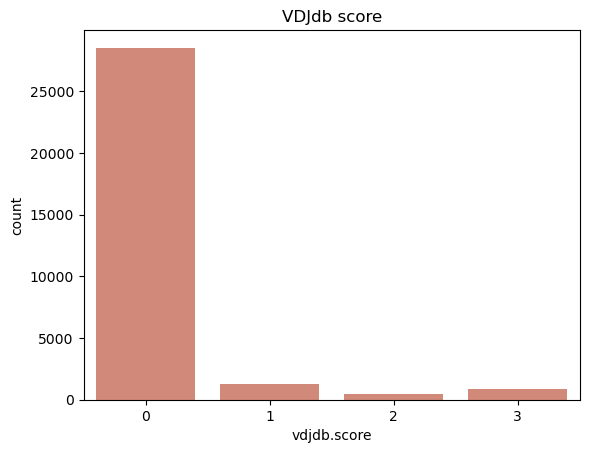

In [8]:
plot = sns.barplot(x=vdjdb['vdjdb.score'].value_counts().index, y=vdjdb['vdjdb.score'].value_counts(), color='#e0816b').set(title='VDJdb score')
fig = plot[0].get_figure()
fig.savefig("score_count.png")

/scratch/ipykernel_137797/2968841955.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels=vdjdb['antigen.epitope'].value_counts().head(20).index, rotation=45, ha='right')


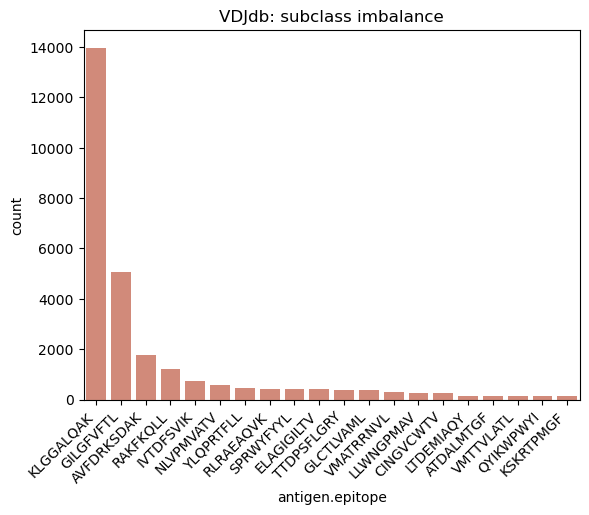

In [9]:
plot = sns.barplot(x=vdjdb['antigen.epitope'].value_counts().head(20).index, y=vdjdb['antigen.epitope'].value_counts().head(20), color='#e0816b')
plot.set_xticklabels(labels=vdjdb['antigen.epitope'].value_counts().head(20).index, rotation=45, ha='right')
plot.set(title='VDJdb: subclass imbalance')
fig = plot.get_figure()
fig.savefig("epitope_count.svg", bbox_inches = 'tight')

In [10]:
len(vdjdb['antigen.epitope'].unique())

839

The data has an extrmely long-tailed distribution when it comes to antigens: most of them are rare, which makes the prediction more challenging 

<Axes: xlabel='mhc.a'>

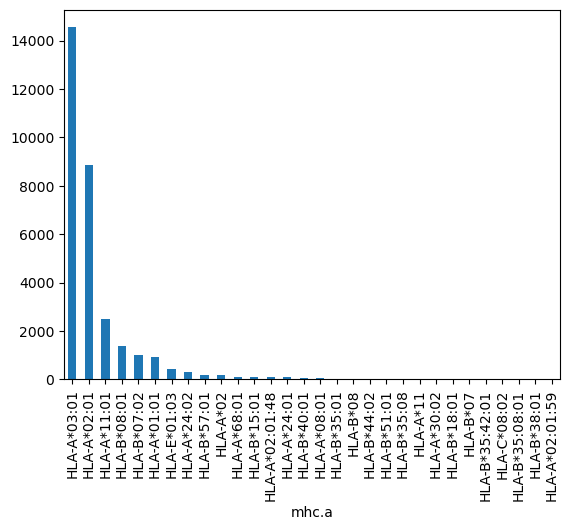

In [11]:
vdjdb['mhc.a'].value_counts().head(30).plot(kind='bar')

In [12]:
len(vdjdb['mhc.a'].unique())

65

In [13]:
vdjdb['antigen.epitope'].value_counts()

antigen.epitope
KLGGALQAK     13974
GILGFVFTL      5047
AVFDRKSDAK     1764
RAKFKQLL       1235
IVTDFSVIK       729
              ...  
ELLVRINRL         1
MLFSHGLVK         1
EMLFSHGLVK        1
TLREIRRYQK        1
WSYDSTLLAY        1
Name: count, Length: 839, dtype: int64

### 6. Let's prepare the data for trainig

We would not need all the other metadata for training in this implementation

In [24]:
vdjdb_new = vdjdb[['cdr3.alpha', 'cdr3.beta', 'antigen.epitope']]

In [25]:
vdjdb_new

,cdr3.alpha,cdr3.beta,antigen.epitope
0,CAVQDLGTSGSRLTF,CASSARSGELFF,HPVGEADYFEY
1,CAVQDLGTSGSRLTF,CASSARSGELFF,HPVGEADYFEY
2,CAVQDLQTSGSRLTF,CASSAPTGELFF,HPVGEADYFEY
3,CAVQSLETSGSRLTF,CASSARTGELFF,HPVGEADYFEY
6,CAVRDGGTGFQKLVF,CASRQDRDYQETQYF,HPVGEADYFEY
...,...,...,...
68085,CAVNEGDNMLTF,CASSPTMHYEQYF,LLWNGPMAV
68086,CAVNDDKIIF,CATGRDRAYEQYF,LLWNGPMAV
68097,CARSTDSWGKLQF,CASTPEGSYNEQFF,LLWNGPMAV
68100,CVVGRTDKLIF,CATSLGQAYGYTF,LLWNGPMAV


To generate the negative class (shuffle the data) we will use a list of all unique peptides (pep_list) and their probabilities (probs)

In [ ]:
vdjdb_new['antigen.epitope'] = vdjdb_new['antigen.epitope'].astype(str)

In [42]:
def peptide_shuffle(df):
    
    '''This function receives a pandas dataframe that has columns "cdr3.alpha", "cdr3.beta", "antigen.epitope" and
    retrieves a list of all unique peptides in the data and a list of their counts (probabilities) from it. It then 
    returns a dataframe with a new column 'antigen.epitope.shuffled' which contains a new false (shuffled) peptide.
    The negative peptide != positive peptide and the distribution of the peptides in the negative class stays the same
    as in the positive class (because we pass probabilities into the choise function) so there is no bias'''
    
    
    np.random.seed(42)
    pep_list = df['antigen.epitope'].value_counts().index.tolist()
    counts = df['antigen.epitope'].value_counts().tolist()
    counts = np.array(counts)
    s = counts.sum()
    probs = counts/s
    df['antigen.epitope.shuffled'] = ' '
    for index, row in df.iterrows():
        current_pep = choice(pep_list, 1, p=probs)
        if current_pep == row['antigen.epitope']:
            while current_pep == row['antigen.epitope']:
                current_pep = choice(pep_list, 1, p=probs)
        df.at[index, 'antigen.epitope.shuffled'] = current_pep
    return df

In [33]:
vdjdb_new = vdjdb_new.merge(vdjdb_new['antigen.epitope'].value_counts(), on='antigen.epitope')

In [34]:
vdjdb_new

,cdr3.alpha,cdr3.beta,antigen.epitope,count
0,CAVQDLGTSGSRLTF,CASSARSGELFF,HPVGEADYFEY,15
1,CAVQDLGTSGSRLTF,CASSARSGELFF,HPVGEADYFEY,15
2,CAVQDLQTSGSRLTF,CASSAPTGELFF,HPVGEADYFEY,15
3,CAVQSLETSGSRLTF,CASSARTGELFF,HPVGEADYFEY,15
4,CAVRDGGTGFQKLVF,CASRQDRDYQETQYF,HPVGEADYFEY,15
...,...,...,...,...
31072,CAQEDSGAGSYQLTF,CASSQDRNYGYTF,KLSALGINAV,22
31073,CAYGQGAQKLVF,CASSFLAGPQETQYF,KLSALGINAV,22
31074,CAYRSPNAGNMLTF,CASSYLGSGANVLTF,KLSALGINAV,22
31075,CAVNRDAGGTSYGKLTF,CASALSWEGLAESYEQYF,KLSALGINAV,22


Let's divide the data to entries with rare and not rare epitopes to test the model on a "hard" testset

In [35]:
count_less_than_70 = vdjdb_new[vdjdb_new['count']<70]
count_more_than_70 = vdjdb_new[vdjdb_new['count']>=70]

This is our training and 'easy' test and validation subsets: 

In [43]:
count_more_than_70_with_negatives = peptide_shuffle(count_more_than_70)
count_more_than_70_with_negatives 

/scratch/ipykernel_137797/3519222792.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['antigen.epitope.shuffled'] = ' '


,cdr3.alpha,cdr3.beta,antigen.epitope,count,antigen.epitope.shuffled
15,CAVRDGTANNLFF,CASSISSTGELFF,GILGFVFTL,5047,KLGGALQAK
16,CAFMKDAGGTSYGKLTF,CASSIGVYGYTF,GILGFVFTL,5047,CINGVCWTV
17,CAGGGSQGNLIF,CASSIRSSYEQYF,GILGFVFTL,5047,AVFDRKSDAK
18,CALAGSQGNLIF,CASSIRASYEQYF,GILGFVFTL,5047,KLGGALQAK
19,CAGADGGSQGNLIF,CASSGRAAGELFF,GILGFVFTL,5047,KLGGALQAK
...,...,...,...,...,...
30835,CAVGVGGAANKLIF,CASSSGTSGFVGGTQYF,VMATRRNVL,296,RAKFKQLL
30836,CAGINNARLMF,CASSYPSGGWESQYF,VMATRRNVL,296,KLGGALQAK
30837,CAMREGAFDYKLSF,CATSRDEQSYEQYF,VMATRRNVL,296,KLGGALQAK
30838,CALSALSNKLTF,CAWSSWDNEQFF,VMATRRNVL,296,KLGGALQAK


This is our 'hard' test subset. It is nesessary to see if the model has gained an ability ti generalise :

In [45]:
count_less_than_70_with_negatives = peptide_shuffle(count_less_than_70)
count_less_than_70_with_negatives 

/scratch/ipykernel_137797/3519222792.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['antigen.epitope.shuffled'] = ' '


,cdr3.alpha,cdr3.beta,antigen.epitope,count,antigen.epitope.shuffled
0,CAVQDLGTSGSRLTF,CASSARSGELFF,HPVGEADYFEY,15,YSEHPTFTSQY
1,CAVQDLGTSGSRLTF,CASSARSGELFF,HPVGEADYFEY,15,ALPETTADI
2,CAVQDLQTSGSRLTF,CASSAPTGELFF,HPVGEADYFEY,15,ISDYDYYRY
3,CAVQSLETSGSRLTF,CASSARTGELFF,HPVGEADYFEY,15,SMMILSDDA
4,CAVRDGGTGFQKLVF,CASRQDRDYQETQYF,HPVGEADYFEY,15,RTLNAWVKV
...,...,...,...,...,...
31072,CAQEDSGAGSYQLTF,CASSQDRNYGYTF,KLSALGINAV,22,RYSIFFDYM
31073,CAYGQGAQKLVF,CASSFLAGPQETQYF,KLSALGINAV,22,EFFWDANDIY
31074,CAYRSPNAGNMLTF,CASSYLGSGANVLTF,KLSALGINAV,22,QMMVKAGL
31075,CAVNRDAGGTSYGKLTF,CASALSWEGLAESYEQYF,KLSALGINAV,22,KLFIRQEEV


Let's now substract the 'easy' test and validation subsets:

In [46]:
count_more_than_70_test_and_val  = count_more_than_70_with_negatives.sample(n=3285, random_state = 42)
count_more_than_70_test_and_val

,cdr3.alpha,cdr3.beta,antigen.epitope,count,antigen.epitope.shuffled
18445,CAVGELAAGNKLTF,CATSDGRDDEQFF,KLGGALQAK,13974,GILGFVFTL
20080,CAMRDKTPAAGNKLTF,CASNPRPRPSYTDTQYF,KLGGALQAK,13974,GILGFVFTL
15221,CAFIGDAGGTSYGKLTF,CASSLDGGPQETQYF,KLGGALQAK,13974,SPRWYFYYL
18763,CAMRPPFRGGYNKLIF,CASSLGQDGYTF,KLGGALQAK,13974,NLVPMVATV
22686,CVVTAGNTGKLIF,CASSRDSASTGELFF,AVFDRKSDAK,1764,KLGGALQAK
...,...,...,...,...,...
24659,CAGGDTGNQFYF,CASSFSGNTGELFF,RAKFKQLL,1235,RLRAEAQVK
7573,CATDRSTGNQFYF,CASSIDWPGIYGYTF,KLGGALQAK,13974,YLQPRTFLL
1318,CAVMMVYGDDKIIF,CASSQDVHRGIPGELFF,GILGFVFTL,5047,KLGGALQAK
21335,CAMNPAWGGATNKLIF,CSASPGDYEQYF,IVTDFSVIK,729,KLGGALQAK


In [47]:
ind = count_more_than_70_test_and_val.index
train = count_more_than_70_with_negatives.drop(ind)
train 

,cdr3.alpha,cdr3.beta,antigen.epitope,count,antigen.epitope.shuffled
15,CAVRDGTANNLFF,CASSISSTGELFF,GILGFVFTL,5047,KLGGALQAK
16,CAFMKDAGGTSYGKLTF,CASSIGVYGYTF,GILGFVFTL,5047,CINGVCWTV
17,CAGGGSQGNLIF,CASSIRSSYEQYF,GILGFVFTL,5047,AVFDRKSDAK
18,CALAGSQGNLIF,CASSIRASYEQYF,GILGFVFTL,5047,KLGGALQAK
19,CAGADGGSQGNLIF,CASSGRAAGELFF,GILGFVFTL,5047,KLGGALQAK
...,...,...,...,...,...
30835,CAVGVGGAANKLIF,CASSSGTSGFVGGTQYF,VMATRRNVL,296,RAKFKQLL
30836,CAGINNARLMF,CASSYPSGGWESQYF,VMATRRNVL,296,KLGGALQAK
30837,CAMREGAFDYKLSF,CATSRDEQSYEQYF,VMATRRNVL,296,KLGGALQAK
30838,CALSALSNKLTF,CAWSSWDNEQFF,VMATRRNVL,296,KLGGALQAK


In [48]:
def divide_to_pos_neg(df):
    
    ''' This is a utility function that makes the dataframe more suitable for trainig.
    It receives a  dataframe  with columns "cdr3.alpha", "cdr3.beta", "antigen.epitope",
    "count", "antigen.epitope.shuffled" and returns a dataframe with columns "cdr3.alpha"
    "cdr3.beta", "antigen.epitope", "target" '''
    
    df_pos = df.drop(columns = ['antigen.epitope.shuffled', 'count'])
    df_pos['target'] = int(1)
    df_neg = df.drop(columns = ['antigen.epitope', 'count'])
    df_neg['target'] = int(0)
    df_neg = df_neg.rename(columns={"antigen.epitope.shuffled": "antigen.epitope"})
    df = pd.concat([df_pos, df_neg])
    df = df.sample(frac=1, random_state=42)
    return df

In [49]:
train = divide_to_pos_neg(train)

Here's our resulting training dataset

In [50]:
train

,cdr3.alpha,cdr3.beta,antigen.epitope,target
3551,CARGGATNKLIF,CASSDTGVDEQFF,KLGGALQAK,0
10412,CAVMDTGRRALTF,CASSYSRTGGLNTEAFF,TTDPSFLGRY,0
21586,CVVSDRGSQGNLIF,CASSGGTSGYNEQFF,IVTDFSVIK,1
16590,CAVLPENFGNEKLTF,CASSPTTGPYSNQPQHF,NLVPMVATV,0
21892,CAVDLMKTSYDKVIF,CASSQARHEQYF,IVTDFSVIK,1
...,...,...,...,...
13108,CGAGPSGTYKYIF,CASSQNNQGRVEQYF,KLGGALQAK,1
23243,CAASSNYQLIW,CASSYSGGAYEQYF,KLGGALQAK,0
15798,CAASSSGAQKLVF,CASSARDGNIQYF,ELAGIGILTV,0
972,CATDDLGLTTDSWGKFQF,CASSIFGSSNQPQHF,GILGFVFTL,1


In [179]:
#train.to_csv('train.csv', index=False)

In [51]:
hard_test = divide_to_pos_neg(count_less_than_70_with_negatives)
hard_test

,cdr3.alpha,cdr3.beta,antigen.epitope,target
29444,CALSEAFSGGYQKVTF,CASSELAKGQGEQFF,MPLSAPTLL,0
29666,CALSVSHNTDKLIF,CASSLSVSFIVDEQFF,ILFTRFFYV,0
29988,CAMREEYNFNKFYF,CASSGPGTLNLDTF,YINVFAFPF,1
30019,CAYRRFESGSEKLVF,CSARDPILNTEAFF,GPRLGVRAT,0
28114,CAVRHPLGGATNKLIF,CASSPQVSGANVLTF,MEVTPSGTWL,1
...,...,...,...,...
25675,CAASANGNQFYF,CASSRQGGNYGYTF,SVLYYQNNV,0
29271,CAASDNGNQFYF,CASSQEIGVYGYTF,NTNSSPDDQIGYY,0
29306,CACTGGGADGLTF,CAWSPGTASNQPQHF,RLARLALVL,0
29470,CAEEGGGADGLTF,CSVVRGSYNEQFF,MLDLQPETT,0


In [52]:
count_more_than_70_val = count_more_than_70_test_and_val.sample(n=1643, random_state=42)
ind = count_more_than_70_val.index
count_more_than_70_test = count_more_than_70_test_and_val.drop(ind)
count_more_than_70_test

,cdr3.alpha,cdr3.beta,antigen.epitope,count,antigen.epitope.shuffled
20080,CAMRDKTPAAGNKLTF,CASNPRPRPSYTDTQYF,KLGGALQAK,13974,GILGFVFTL
15221,CAFIGDAGGTSYGKLTF,CASSLDGGPQETQYF,KLGGALQAK,13974,SPRWYFYYL
18763,CAMRPPFRGGYNKLIF,CASSLGQDGYTF,KLGGALQAK,13974,NLVPMVATV
22686,CVVTAGNTGKLIF,CASSRDSASTGELFF,AVFDRKSDAK,1764,KLGGALQAK
11190,CAVRDTIFGNNARLMF,CASSEKTGTGPHEQYF,KLGGALQAK,13974,GILGFVFTL
...,...,...,...,...,...
21143,CAYRSAQETSGSRLTF,CASSQGLLGGELFF,ELAGIGILTV,403,KLGGALQAK
19551,CALSVDRGSTLGRLYF,CSARDFSGGTDTQYF,KLGGALQAK,13974,GILGFVFTL
4143,CAMRDGGGGFKTIF,CASSGDTGTTLYNEQFF,GILGFVFTL,5047,KLGGALQAK
495,CALSEASLVDSNYQLIW,CASSPTSGGYNEQFF,GILGFVFTL,5047,KLGGALQAK


In [188]:
easy_val = divide_to_pos_neg(count_more_than_70_val)
easy_val

,cdr3.alpha,cdr3.beta,antigen.epitope,target
49,CAGAEGGSQGNLIF,CASSIRSTGELFF,KLGGALQAK,0
15271,CATDGVAQKLVF,CASSLGLAGPSTDTQYF,RLRAEAQVK,0
11349,CALQSSMDSNYQLIW,CASSYSAPEQFF,GILGFVFTL,0
1936,CAVQNQAGTALIF,CASSLAGSYNEQFF,KLGGALQAK,0
21901,CAAHPPMYSGGGADGLTF,CATSDRLAGGELFF,IVTDFSVIK,1
...,...,...,...,...
5712,CLVGVYNQGGKLIF,CASSQEVGTSGEGEQFF,CINGVCWTV,1
21818,CAVKRLSGGSYIPTF,CAWSLGTLSNEQFF,IVTDFSVIK,1
23640,CAATLSNDYKLSF,CASSQVLAGTDTQYF,AVFDRKSDAK,1
5409,CVVNTPNDYKLSF,CASSSGGGAPSGNTIYF,GLCTLVAML,1


In [189]:
easy_test = divide_to_pos_neg(count_more_than_70_test)
easy_test

,cdr3.alpha,cdr3.beta,antigen.epitope,target
1962,CALKGGSEKLVF,CASSPWDSRFYGYTF,KLGGALQAK,0
3199,CAGPRGGATNKLIF,CASSVSSYNEQFF,GILGFVFTL,1
23182,CAESSVSDGQKLLF,CASSYWGNSYNSPLHF,GILGFVFTL,0
7815,CAVNGYNKLIF,CASSLSGGVTEAFF,RTLNAWVKV,0
3123,CAARPSNTGKLIF,CASSPRSGNEQYF,GILGFVFTL,1
...,...,...,...,...
27183,CAVSPTGTASKLTF,CASSLIAGGPEAKNIQYF,SPRWYFYYL,1
21588,CALRSTGGFKTIF,CASSVGLSYEQYF,IVTDFSVIK,1
4288,CALSETPRGGGTSYGKLTF,CASSIVSGGYNEQFF,GILGFVFTL,1
11425,CAVHPDRDTGFQKLVF,CASSMMGQPQHF,KLGGALQAK,1


# This is an example of the data filtration and splitting. Pre-made train and validation data for easy replication are available at /main/data/ of the current repo